# Testing the non-Markovian Path Analysis Package
 

In [1]:
import sys
sys.path.append("../")
sys.path.append("../nmpath/")
from test.tools_for_notebook import *
%matplotlib inline
from nmpath.auxfunctions import *
from nmpath.mfpt import *
from nmpath.mappers import rectilinear_mapper
#from nmpath.mappers import voronoi_mapper

## 2D Toy model

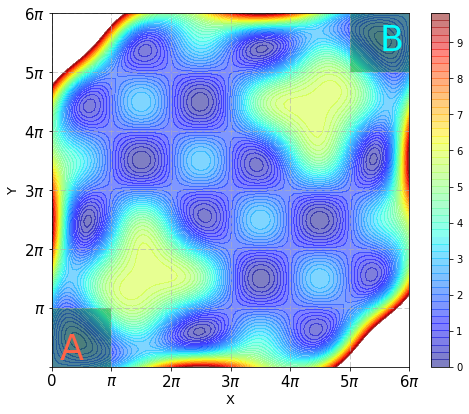

In [2]:
plot_traj([],[])

## MC simulation

In [3]:
#Generating MC trajectories
mc_traj1_2d = mc_simulation2D(100000)
mc_traj2_2d = mc_simulation2D(10000)


## 1 - Ensemble class (analysis of continuos trajectories)

Stores an esemble (list) of trajectories (np.arrays). The ensemble could have any number of trajectories including no trajectories at all.

### Creating an Ensemble

In [4]:
# Empty ensemble with no trajectories
my_ensemble = Ensemble()

From a single trajectory:

In [5]:
# from a single trajectory
my_ensemble = Ensemble([mc_traj1_2d],verbose=True)

Read 1 (2-dimensional) trajectories of average length 100000.0.


From a list of trajectories:

In [6]:
# We have to set list_of_trajs = True

my_list_of_trajs = [mc_traj1_2d, mc_traj2_2d]

my_ensemble = Ensemble(my_list_of_trajs, verbose=True)

Read 2 (2-dimensional) trajectories of average length 55000.0.


### Ensembles are iterable objects  

In [7]:
for traj in my_ensemble:
    print(len(traj))

100000
10000


### Adding trajectories to the Ensemble
New trajectories can be added to the ensemble as long as there is consistency in the number of variables.

In [8]:
my_ensemble = Ensemble(verbose=True)

my_ensemble.add_trajectory(mc_traj1_2d)

my_ensemble.add_trajectory(mc_traj2_2d)


Empty ensemble generated

Ensemble with 1 (2-dimensional) trajectories
Total number of snapshots: 100000

Ensemble with 2 (2-dimensional) trajectories
Total number of snapshots: 110000


## "Printing" the ensemble

In [9]:
print(my_ensemble)


Ensemble with 2 (2-dimensional) trajectories
Total number of snapshots: 110000


### Defining states and computing MFPTs
The states are considered intervals in the is the class is Ensemble

In [10]:
stateA = [[0,pi],[0,pi]]
stateB = [[5*pi,6*pi],[5*pi,6*pi]]

my_ensemble.mfpts(stateA, stateB)

{'mfptAB': 1629.5757575757575,
 'mfptBA': 1721.09375,
 'std_err_mfptAB': 250.54073763098435,
 'std_err_mfptBA': 258.39475296173157}

### Sum of ensembles (ensemble + ensemble)

In [11]:
seq1 = mc_simulation2D(20000)
seq2 = mc_simulation2D(20000)

my_e1 = Ensemble([seq1])
my_e2 = Ensemble([seq2])

ensemble1 = my_e1 + my_e2

#### Another simple example

In [12]:
e1 = Ensemble([[1.,2.,3.,4.]],verbose=True)
e2 = Ensemble([[2,3,4,5]])
e3 = Ensemble([[2,1,1,4]])

my_ensembles = [e1, e2, e3]

ensemble_tot = Ensemble([])

for ens in my_ensembles:
    ensemble_tot += ens

#ensemble_tot.mfpts([1,1],[4,4])

Read 1 (1-dimensional) trajectories of average length 4.0.


### Computing the count matrix and transition matrix

In [13]:
n_states = N**2
bin_bounds = [[i*pi for i in range(7)],[i*pi for i in range(7)]]
C1 = my_ensemble._count_matrix(n_states, map_function=rectilinear_mapper(bin_bounds))
print(C1)

[[ 6824.   109.     0. ...,     0.     0.     0.]
 [  108.   675.    89. ...,     0.     0.     0.]
 [    0.    70.  3957. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  3670.    84.     0.]
 [    0.     0.     0. ...,    79.   725.   123.]
 [    0.     0.     0. ...,     0.   128.  8285.]]


In [14]:
K1 = my_ensemble._mle_transition_matrix(n_states, map_function=rectilinear_mapper(bin_bounds))
print(K1)

[[ 0.96602492  0.01543035  0.         ...,  0.          0.          0.        ]
 [ 0.11907387  0.74421169  0.09812569 ...,  0.          0.          0.        ]
 [ 0.          0.01531059  0.86548556 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.86843351  0.01987695  0.        ]
 [ 0.          0.          0.         ...,  0.08044807  0.73828921
   0.12525458]
 [ 0.          0.          0.         ...,  0.          0.01494454
   0.96730881]]


## 2 - PathEnsemble class

### Creating a path ensemble object

In [15]:
#p_ensemble = PathEnsemble()

#### From ensemble

In [16]:
p_ensemble = PathEnsemble.from_ensemble(my_ensemble, stateA, stateB)

print(p_ensemble)


PathEnsemble with 33 (2-dimensional) trajectories
Total number of snapshots: 53809


### MFPTs

In [17]:
p_ensemble.mfpts(stateA, stateB)

{'mfptAB': 1629.5757575757575,
 'mfptBA': 'NaN',
 'std_err_mfptAB': 250.54073763098435,
 'std_err_mfptBA': 'NaN'}

### Count matrix

In [18]:
print(p_ensemble._count_matrix(n_states, mapping_function2D))

[[ 6816.   109.     0. ...,     0.     0.     0.]
 [   93.   587.    69. ...,     0.     0.     0.]
 [    0.    44.  2347. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  1520.    35.     0.]
 [    0.     0.     0. ...,    21.   126.    14.]
 [    0.     0.     0. ...,     0.     0.     0.]]


In [19]:
#clusters = p_ensemble.cluster(distance_metric = 'RMSD', n_cluster=10, method = 'K-means')


## 3 - DiscreteEnsemble class

We can generate a discrete ensemble from the same mapping function and we should obtain exaclty the same result:

In [20]:
d_ens = DiscreteEnsemble.from_ensemble(my_ensemble, mapping_function2D)

print(d_ens)


DiscreteEnsemble with 2 (1-dimensional) trajectories
Total number of snapshots: 110000


### Count matrix and transition matrix

In [21]:
C2 = d_ens._count_matrix(n_states)
print(C2)

[[ 6824.   109.     0. ...,     0.     0.     0.]
 [  108.   675.    89. ...,     0.     0.     0.]
 [    0.    70.  3957. ...,     0.     0.     0.]
 ..., 
 [    0.     0.     0. ...,  3670.    84.     0.]
 [    0.     0.     0. ...,    79.   725.   123.]
 [    0.     0.     0. ...,     0.   128.  8285.]]


In [22]:
K2= d_ens._mle_transition_matrix(n_states)
print(K2)

[[ 0.96602492  0.01543035  0.         ...,  0.          0.          0.        ]
 [ 0.11907387  0.74421169  0.09812569 ...,  0.          0.          0.        ]
 [ 0.          0.01531059  0.86548556 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.86843351  0.01987695  0.        ]
 [ 0.          0.          0.         ...,  0.08044807  0.73828921
   0.12525458]
 [ 0.          0.          0.         ...,  0.          0.01494454
   0.96730881]]


### Defining states and computing MFPTs
The states are now considered sets, defining the states as follow we should obtain the same results

In [23]:
stateA = [0]
stateB = [N*N-1]

d_ens.mfpts(stateA, stateB)

{'mfptAB': 1629.5757575757575,
 'mfptBA': 1721.09375,
 'std_err_mfptAB': 250.54073763098435,
 'std_err_mfptBA': 258.39475296173157}

### Generating a Discrete Ensemble from the transition matrix

In [24]:
d_ens2 = DiscreteEnsemble.from_transition_matrix(K2, sim_length = 100000)

In [25]:
#d_ens2.mfpts(stateA,stateB)

## 4 - DiscretePathEnsemble class

### Creating the DPE

#### From Ensemble

In [26]:
dpathEnsemble = DiscretePathEnsemble.from_ensemble(my_ensemble, stateA, stateB, mapping_function2D)
print(dpathEnsemble)


DiscretePathEnsemble with 33 (1-dimensional) trajectories
Total number of snapshots: 53809


In [27]:
#MFPT from the transition matrix
dpathEnsemble.nm_mfpt(ini_probs = None, n_states = N*N)

1629.5757575757254

#### From the transition matrix

In [28]:
n_paths = 100

dpathEnsemble2 = DiscretePathEnsemble.from_transition_matrix\
                (K2, stateA = stateA, stateB = stateB, n_paths = n_paths,ini_pops = [1])
    
print(dpathEnsemble2)


DiscretePathEnsemble with 100 (1-dimensional) trajectories
Total number of snapshots: 96996


### Fundamental sequence

In [29]:
FSs = dpathEnsemble2.fundamental_sequences(K2)
size = len(FSs)

paths = dpathEnsemble2.trajectories

### Plotting paths A -> B

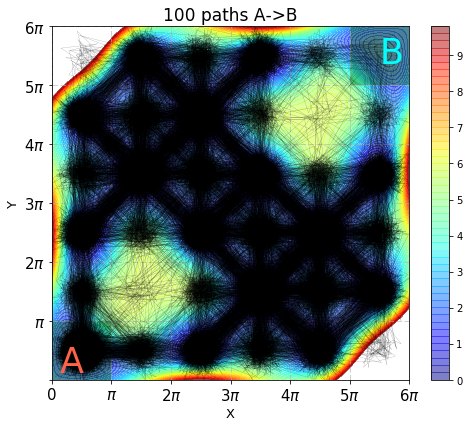

In [30]:
discrete = [True for i in range(size)]

plot_traj([[paths[i],[]] for i in range(size)] , discrete, \
          line_width=0.1, std=0.5, color='k', title = '{} paths A->B'.format(n_paths))

### Plotting Fundamental Sequences A -> B

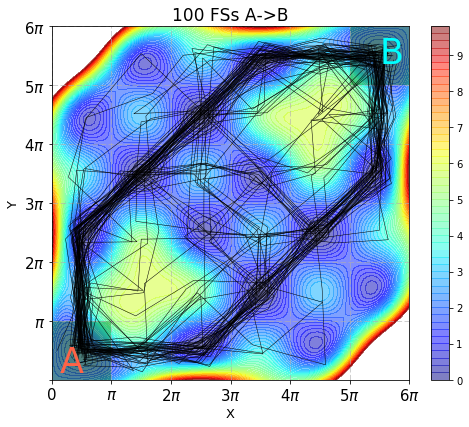

In [31]:
plot_traj([[FSs[i],[]] for i in range(size)] ,discrete, \
          line_width=0.5, std=0.4, color='k', title = '{} FSs A->B'.format(n_paths))

In [32]:
reduced_FSs, weights = dpathEnsemble2.weighted_fundamental_sequences(K2)
new_size = len(weights)
lw = [weights[i]*100 for i in range(new_size)] 

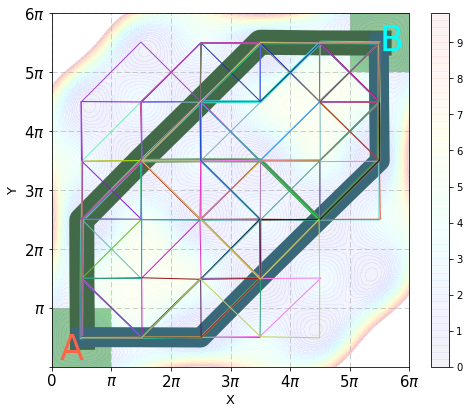

In [33]:
np.random.seed(3)
plot_traj([[reduced_FSs[i],[]] for i in range(new_size)] ,discrete=[True for i in range(new_size)],\
          line_width = lw,std = 0.02, alpha=0.05) 

In [34]:
### for i,w in enumerate(weights):
#     print(w,' ',reduced_FSs[i])

In [35]:
# G = nx.DiGraph()
# G.add_nodes_from(list(range(N*N)))
# max_path = 2
# count = 0
# for path in reduced_FSs:
#     for i in range(len(path)-1):
#         G.add_edge(path[i],path[i+1], weight = 0)
#     count+=1
#     if count >= max_path: break
# nx.draw_random(G,with_labels=True)